# Reintroduction to Pandas

Use this notebook if you are feeling uncomfortable with Python and/or Pandas.

I recommend starting with ["10 Minutes to Pandas"](https://pandas.pydata.org/docs/user_guide/10min.html), and then exploring the links listed on [this page](https://pandas.pydata.org/docs/user_guide/index.html). Most of the sections are fairly short, so don't be intimidated by the long links.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Dataframe using data range

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.487601,-0.557123,-0.834938,1.990910
2013-01-02,1.611165,-1.059638,-0.919327,-0.084114
2013-01-03,-0.790658,0.460067,-0.671279,0.824666
2013-01-04,-0.669530,-1.138792,0.667613,1.820158
2013-01-05,-1.256314,-1.145739,0.646994,-0.091595
2013-01-06,-0.951906,0.562698,0.277976,-0.054237


In [5]:
# Dataframe: dictionary with column labels as keys and column values as values

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# Get first rows of dataframe
df.head()

,A,B,C,D
2013-01-01,1.487601,-0.557123,-0.834938,1.990910
2013-01-02,1.611165,-1.059638,-0.919327,-0.084114
2013-01-03,-0.790658,0.460067,-0.671279,0.824666
2013-01-04,-0.669530,-1.138792,0.667613,1.820158
2013-01-05,-1.256314,-1.145739,0.646994,-0.091595


In [7]:
# Get last 5 rows of dataframe
df.tail(5)

,A,B,C,D
2013-01-02,1.611165,-1.059638,-0.919327,-0.084114
2013-01-03,-0.790658,0.460067,-0.671279,0.824666
2013-01-04,-0.669530,-1.138792,0.667613,1.820158
2013-01-05,-1.256314,-1.145739,0.646994,-0.091595
2013-01-06,-0.951906,0.562698,0.277976,-0.054237


In [8]:
# Create Numpy rep. of dataframe
df.to_numpy()

array([[ 1.48760141, -0.55712257, -0.83493762,  1.99091018],
       [ 1.61116501, -1.05963848, -0.91932709, -0.08411367],
       [-0.7906584 ,  0.46006685, -0.67127887,  0.82466552],
       [-0.66953005, -1.13879179,  0.66761339,  1.82015761],
       [-1.25631438, -1.14573929,  0.6469941 , -0.09159455],
       [-0.95190557,  0.56269849,  0.27797596, -0.05423741]])

In [9]:
# Switch row and columns (transpose)
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.487601,1.611165,-0.790658,-0.669530,-1.256314,-0.951906
B,-0.557123,-1.059638,0.460067,-1.138792,-1.145739,0.562698
C,-0.834938,-0.919327,-0.671279,0.667613,0.646994,0.277976
D,1.990910,-0.084114,0.824666,1.820158,-0.091595,-0.054237


In [10]:
# Ascending sort by specific column
df.sort_values(by="A")

,A,B,C,D
2013-01-05,-1.256314,-1.145739,0.646994,-0.091595
2013-01-06,-0.951906,0.562698,0.277976,-0.054237
2013-01-03,-0.790658,0.460067,-0.671279,0.824666
2013-01-04,-0.669530,-1.138792,0.667613,1.820158
2013-01-01,1.487601,-0.557123,-0.834938,1.990910
2013-01-02,1.611165,-1.059638,-0.919327,-0.084114


In [11]:
df[1:4]

,A,B,C,D
2013-01-02,1.611165,-1.059638,-0.919327,-0.084114
2013-01-03,-0.790658,0.460067,-0.671279,0.824666
2013-01-04,-0.669530,-1.138792,0.667613,1.820158


In [12]:
df.iloc[3]

A   -0.669530
B   -1.138792
C    0.667613
D    1.820158
Name: 2013-01-04 00:00:00, dtype: float64

In [13]:
df.mean()

A   -0.094940
B   -0.479754
C   -0.138827
D    0.734298
dtype: float64

In [15]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [16]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.790658,-0.539933,-1.671279,-0.175334
2013-01-04,-3.669530,-4.138792,-2.332387,-1.179842
2013-01-05,-6.256314,-6.145739,-4.353006,-5.091595
2013-01-06,NaN,NaN,NaN,NaN


In [17]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.300535,1.027667,-0.375895,0.962685
1,0.768522,0.134107,-1.005319,-0.690923
2,-1.360796,0.494696,0.070395,0.559622
3,-0.001112,1.328306,0.416278,0.666381
4,0.461874,-1.055986,0.183199,0.275823
5,-1.169951,-0.260657,-0.058559,-0.257069
6,-0.688509,-0.084281,0.305695,-1.204889
7,0.665893,0.016965,-0.841496,-0.290767
8,-0.121128,0.677910,0.091946,0.317478
9,-0.421706,0.834933,-0.353234,1.291801


In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})


,key,lval
0,foo,1
1,foo,2


In [20]:
left

,key,lval
0,foo,1
1,foo,2


In [21]:
right

,key,rval
0,foo,4
1,foo,5


In [22]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [23]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [25]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.053752,1.030229
1,bar,one,-0.544521,-1.149665
2,foo,two,-0.327418,-1.778273
3,bar,three,1.992808,0.785980
4,foo,two,-1.252059,-0.091257
5,bar,two,1.959328,-0.892802
6,foo,one,0.211527,1.320381
7,foo,three,1.230133,1.082828


In [26]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,3.407615,-1.256488
foo,-0.084064,1.563908


In [27]:
import matplotlib.pyplot as plt

In [32]:
pip install numpy==2.0.2

  Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
 pip install --upgrade numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'numpy.f2py'

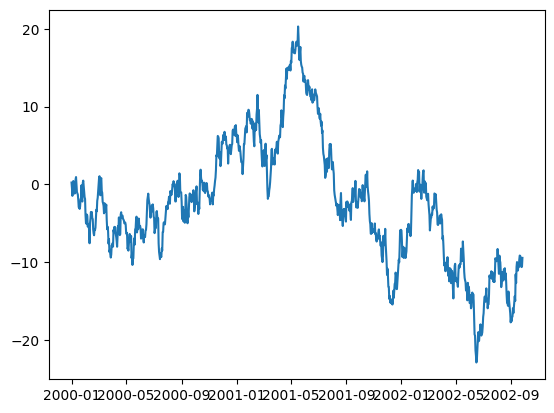

In [ ]:
# Numpy compatability error

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

ModuleNotFoundError: No module named 'numpy.f2py'

<Figure size 640x480 with 0 Axes>

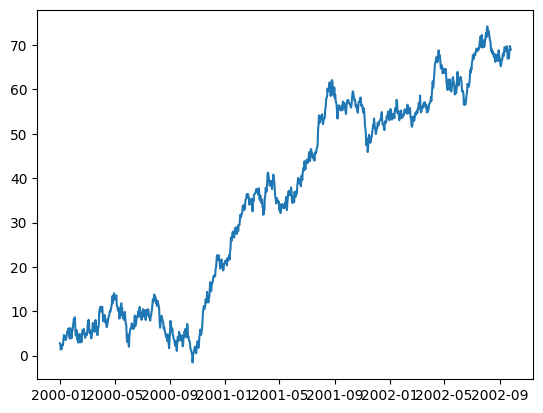

In [ ]:
# Numpy compatability error

df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()

plt.figure();
df.plot();
plt.legend(loc='best');

In [37]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

In [38]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,4,4,3,4,0
1,1,4,3,2,0,4
2,2,0,0,3,1,3
3,3,4,4,2,0,0
4,4,1,3,3,2,1
5,5,0,3,1,4,3
6,6,3,2,1,4,0
7,7,0,0,0,0,4
8,8,3,0,0,4,4
9,9,1,1,4,0,0


In [42]:
pip install openpyxl



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])


,Unnamed: 0,0,1,2,3,4
0,0,4,4,3,4,0
1,1,4,3,2,0,4
2,2,0,0,3,1,3
3,3,4,4,2,0,0
4,4,1,3,3,2,1
5,5,0,3,1,4,3
6,6,3,2,1,4,0
7,7,0,0,0,0,4
8,8,3,0,0,4,4
9,9,1,1,4,0,0
